## Import some prerequirement

In [14]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Set hyperparameters

In [22]:
IMG_WIDTH = 28
IMG_HEIGHT = 28
EPOCHS = 10
BATCH_SIZE= 128
n_classes = 10

## Initialize train and test data

In [4]:
data = np.load('mnist.npz')
[x_train, y_train, x_test, y_test] = data['x_train'], data['y_train'], data['x_test'], data['y_test']

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

## Show dataset

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


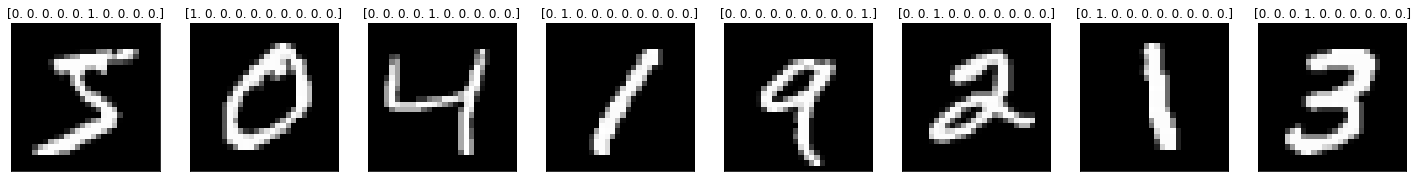

In [8]:
plt.figure(figsize=(25,4))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])

## Define model

In [9]:
def build_model():
    model = Sequential()
    model.add(layers.Flatten(input_shape=(IMG_WIDTH, IMG_HEIGHT)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

## Compile and fit model

In [ ]:
%load_ext tensorboard

In [ ]:
# Compile model adam
model_adam = build_model()
model_adam.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


log_dir = "logs/fit/adam/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit model
model_adam.fit(x_train, y_train,
               validation_data=(x_test, y_test),
               batch_size=BATCH_SIZE,
               epochs=EPOCHS,
               callbacks=[tensorboard_callback])

%tensorboard --logdir logs/fit/adam

In [ ]:
# Compile model rmsprop
model_rmsprop = build_model()
model_rmsprop.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


log_dir = "logs/fit/rmsprop/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


# Fit model
model_rmsprop.fit(x_train, y_train,
                  validation_data=(x_test, y_test),
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  callbacks=[tensorboard_callback])

%tensorboard --logdir logs/fit/rmsprop

In [ ]:
# Compile model adagrad
model_adagrad = build_model()
model_adagrad.compile(optimizer='adagrad',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


log_dir = "logs/fit/adagrad/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model_adagrad.fit(x_train, y_train,
                  validation_data=(x_test, y_test),
                  batch_size=BATCH_SIZE,
                  epochs=EPOCHS,
                  callbacks=[tensorboard_callback])

%tensorboard --logdir logs/fit/adagrad

## Save best model

In [43]:
# save best model
model_rmsprop.save_weights("model.h5")

In [45]:
model_json = model_rmsprop.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


## Evaluate best model

In [41]:
# evaluate best model
y_pred = model_rmsprop.predict(x_test)
print(f'accuracy = {np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100} %')

313/313 [==============================] - 1s 2ms/step
accuracy = 98.06 %


## Get Reports

In [42]:
# get report of metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf = confusion_matrix(y_true, y_pred, normalize=None)

print(conf)

report = classification_report(y_true, y_pred)

print(report)

[[ 975    1    0    1    1    0    0    1    1    0]
 [   3 1119    3    2    0    2    3    1    2    0]
 [   1    0 1008   11    1    0    0    5    5    1]
 [   0    0    2 1000    0    3    0    3    1    1]
 [   2    1    3    0  953    1    2    2    1   17]
 [   2    0    0    9    0  876    2    0    2    1]
 [   2    1    0    1    4    6  944    0    0    0]
 [   1    1    8    1    1    0    0 1003    2   11]
 [   3    1    3    6    3    7    3    4  939    5]
 [   1    2    0    4    6    5    0    2    0  989]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98   